In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import six
from six.moves import range

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
X = np.loadtxt('iris.data', dtype='object', delimiter=',')
Y = X[:,-1]
X = X[:, :-1].astype('f')
X.shape, Y.shape, Y.dtype

((150, 4), (150,), dtype('O'))

`X` is a `NxK` float matrix where each row (`X[i]`) corresponds to a data point.

In [47]:
from scipy.stats import multivariate_normal

def gmm(X, n_classes, n_iter):
    # TODO fill in your code here

    n_classes = int(n_classes)
    
    # init
    n, m = X.shape
    shape = X.shape
    phi = np.full(shape=n_classes, fill_value=1/n_classes)
    weights = np.full(shape=shape, fill_value=1/n_classes)
    random_row = np.random.randint(low=0, high=n, size=n_classes)

    # Mean
    mean = [X[row_index,:] for row_index in random_row]

    # Covariance
    cov = [np.cov(X.T) for _ in range(n_classes)]

    log_likelihoods = []

    for iter in range(n_iter):
        # E-Step
        likelihood = np.zeros((n, n_classes))
        for c in range(n_classes):
            likelihood[:, c] = multivariate_normal.pdf(X, mean=mean[c], cov=cov[c])

        log_likelihood = np.sum(np.log(np.sum(weights, axis=1)))
        log_likelihoods.append(log_likelihood)
        
        numerator = likelihood * phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        phi = weights.mean(axis=0)
    
        # M-Step
        for c in range(n_classes):
            weight = weights[:, [c]]
            total_weight = weight.sum()
            mean[c] = (X * weight).sum(axis=0) / total_weight
            cov[c] = np.cov(X.T, aweights=(weight/total_weight).flatten(), bias=True)

    class_assignments = np.argmax(weights, axis=1)
    mean = np.array(mean)

    return class_assignments, mean, cov

In [64]:
class_assignments, mean, cov = gmm(X, 3, 300)  # You may want to tune the number of iterations

## Visualization: a Cross Section

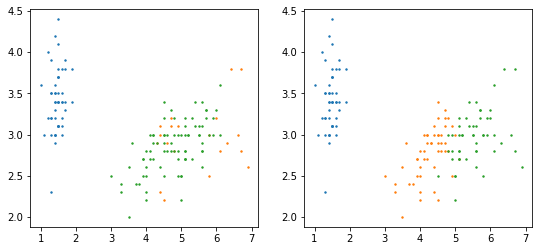

In [65]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(X[class_assignments==k, 2], X[class_assignments==k, 1], s=2)
plt.subplot(122)
for k, class_name in enumerate(np.unique(Y)):
    plt.scatter(X[Y==class_name, 2], X[Y==class_name, 1], s=2)

## Visualization: PCA Projection

In [66]:
evals, evecs = np.linalg.eigh(np.cov(X.T))
to_crd = lambda x: ((x-x.mean(axis=0))@evecs)[:,-2:]
crds = to_crd(X)

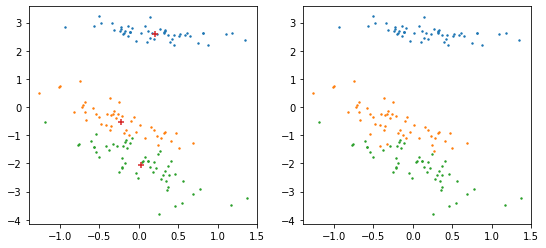

In [69]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(crds[class_assignments==k, 0], crds[class_assignments==k, 1], s=2)
plt.scatter(to_crd(mean)[:,0], to_crd(mean)[:,1], s=30, marker='+')
plt.subplot(122)
for k in np.unique(Y):
    plt.scatter(crds[Y==k, 0], crds[Y==k, 1], s=2)